# Kaggle에서 구한 LSTM Tutorial  

## LSTM, pandas, 시계열 데이터 처리, seaborn 등의 학습 가능 
#### [참조] https://www.kaggle.com/amirrezaeian/time-series-data-analysis-using-lstm-tutorial    

# 흐름
### 1. 데이터 전처리
### 2. 학습 데이터 선택
### 3. 딥러닝 학습
### 4. 결과 확인

### The description of data can be found here: 
http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

### Attribute Information:

#### 1.date: Date in format dd/mm/yyyy 
#### 2.time: time in format hh:mm:ss 
#### 3.global_active_power: household global minute-averaged active power (in kilowatt) 
#### 4.global_reactive_power: household global minute-averaged reactive power (in kilowatt) 
#### 5.voltage: minute-averaged voltage (in volt) 
#### 6.global_intensity: household global minute-averaged current intensity (in ampere) 
#### 7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered). 
#### 8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. 
#### 9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.


# 데이터 불러오기 + 전처리

In [18]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.layers import Embedding
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [19]:
## 데이터 다운로드 경로: http://archive.ics.uci.edu/ml/machine-learning-databases/00235/
## 데이터를 다운받은 다음 data 폴더에 압출 풀기 -> 'household_power_consumption.txt' <- 이 파일 
## 코드 실행

df = pd.read_csv('./data/sub1_total.txt', sep=',', 
                 parse_dates={'dt' : ['Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')
df1 = pd.read_csv('./data/sub2_total.txt', sep=',', 
                  parse_dates={'dt' : ['Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')
df2 = pd.read_csv('./data/sub3_total.txt', sep=',', 
                 parse_dates={'dt' : ['Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')
df3 = pd.read_csv('./data/sub4_total.txt', sep=',', 
                 parse_dates={'dt' : ['Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')
df4 = pd.read_csv('./data/sub5_total.txt', sep=',', 
                 parse_dates={'dt' : ['Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')
df5 = pd.read_csv('./data/sub6_total.txt', sep=',', 
                 parse_dates={'dt' : ['Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')
df6 = pd.read_csv('./data/sub7_total.txt', sep=',', 
                 parse_dates={'dt' : ['Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')
df7 = pd.read_csv('./data/sub8_total.txt', sep=',', 
                 parse_dates={'dt' : ['Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')
# def encode(data):
#     print('Shape of data (BEFORE encode): %s' % str(data.shape))
#     encoded = to_categorical(data)
#     print('Shape of data (AFTER  encode): %s\n' % str(encoded.shape))
#     return encoded

# use pd.concat to join the new columns with your original dataframe
df = pd.concat([df,pd.get_dummies(df['label'], prefix='label')],axis=1)
df1 = pd.concat([df1,pd.get_dummies(df1['label'], prefix='label')],axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['label'], prefix='label')],axis=1)
df3 = pd.concat([df3,pd.get_dummies(df3['label'], prefix='label')],axis=1)
df4 = pd.concat([df4,pd.get_dummies(df4['label'], prefix='label')],axis=1)
df5 = pd.concat([df5,pd.get_dummies(df5['label'], prefix='label')],axis=1)
df6 = pd.concat([df6,pd.get_dummies(df6['label'], prefix='label')],axis=1)
df7 = pd.concat([df7,pd.get_dummies(df7['label'], prefix='label')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
df.drop(['label'],axis=1, inplace=True)
df1.drop(['label'],axis=1, inplace=True)
df2.drop(['label'],axis=1, inplace=True)
df3.drop(['label'],axis=1, inplace=True)
df4.drop(['label'],axis=1, inplace=True)
df5.drop(['label'],axis=1, inplace=True)
df6.drop(['label'],axis=1, inplace=True)
df7.drop(['label'],axis=1, inplace=True)

print(df)

                     Channel 1     Channel 2     Channel 3  Channel 4  \
dt                                                                      
2018-06-15 00:00:01  -0.000048 -1.182200e-04 -7.343400e-05  -0.000153   
2018-06-15 00:00:02  -0.000046 -1.198600e-04 -7.523300e-05  -0.000155   
2018-06-15 00:00:03  -0.000045 -1.214900e-04 -7.708700e-05  -0.000157   
2018-06-15 00:00:04  -0.000044 -1.231300e-04 -7.899500e-05  -0.000158   
2018-06-15 00:00:05  -0.000043 -1.247700e-04 -8.095700e-05  -0.000160   
2018-06-15 00:00:06  -0.000042 -1.264000e-04 -8.297100e-05  -0.000161   
2018-06-15 00:00:07  -0.000041 -1.280300e-04 -8.503800e-05  -0.000162   
2018-06-15 00:00:08  -0.000039 -1.296700e-04 -8.715600e-05  -0.000164   
2018-06-15 00:00:09  -0.000038 -1.312900e-04 -8.932300e-05  -0.000165   
2018-06-15 00:00:10  -0.000037 -1.329200e-04 -9.153800e-05  -0.000166   
2018-06-15 00:00:11  -0.000036 -1.345300e-04 -9.379800e-05  -0.000167   
2018-06-15 00:00:12  -0.000035 -1.361500e-04 -9.610

### 1) 데이터 중 'nan' 과 '?' 가 문자열로 존재. 둘다 numpy의 nan 으로 import과정에서 위와 같이 불러와 똑같이 취급.

### 2) Date와 Time은 하나의 column(dt)으로 취급. 

### 3) time을 index로 data를 time series로 취급 

### 4) Label의 classification을 목적으로 softmax 이용을위해 3개의 one-hot으로 분할

In [20]:
df.head()

,Channel 1,Channel 2,Channel 3,Channel 4,Channel 5,Channel 6,Channel 7,Channel 8,Channel 9,Channel 10,Channel 11,Channel 12,Channel 13,Channel 14,Channel 15,Channel 16,label_0,label_1,label_2
dt,,,,,,,,,,,,,,,,,,,
2018-06-15 00:00:01,-0.000048,-0.000118,-0.000073,-0.000153,0.000005,0.000012,-0.000022,-0.000088,-0.000021,-0.000053,-0.000100,-0.000030,0.000033,0.000007,-0.00003,-0.000002,1,0,0
2018-06-15 00:00:02,-0.000046,-0.000120,-0.000075,-0.000155,0.000005,0.000011,-0.000021,-0.000093,-0.000021,-0.000051,-0.000102,-0.000030,0.000032,0.000006,-0.00003,-0.000004,1,0,0
2018-06-15 00:00:03,-0.000045,-0.000121,-0.000077,-0.000157,0.000005,0.000010,-0.000021,-0.000098,-0.000020,-0.000050,-0.000103,-0.000030,0.000031,0.000005,-0.00003,-0.000005,1,0,0
2018-06-15 00:00:04,-0.000044,-0.000123,-0.000079,-0.000158,0.000005,0.000009,-0.000020,-0.000104,-0.000019,-0.000048,-0.000105,-0.000030,0.000030,0.000004,-0.00003,-0.000006,1,0,0
2018-06-15 00:00:05,-0.000043,-0.000125,-0.000081,-0.000160,0.000005,0.000008,-0.000020,-0.000110,-0.000019,-0.000047,-0.000106,-0.000029,0.000029,0.000002,-0.00003,-0.000007,1,0,0


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7038 entries, 2018-06-15 00:00:01 to 2018-06-15 01:57:18
Data columns (total 19 columns):
Channel 1     7038 non-null float64
Channel 2     7038 non-null float64
Channel 3     7038 non-null float64
Channel 4     7038 non-null float64
Channel 5     7038 non-null float64
Channel 6     7038 non-null float64
Channel 7     7038 non-null float64
Channel 8     7038 non-null float64
Channel 9     7038 non-null float64
Channel 10    7038 non-null float64
Channel 11    7038 non-null float64
Channel 12    7038 non-null float64
Channel 13    7038 non-null float64
Channel 14    7038 non-null float64
Channel 15    7038 non-null float64
Channel 16    7038 non-null float64
label_0       7038 non-null uint8
label_1       7038 non-null uint8
label_2       7038 non-null uint8
dtypes: float64(16), uint8(3)
memory usage: 955.4 KB


In [22]:
df.shape

(7038, 19)

In [23]:
df.describe()

,Channel 1,Channel 2,Channel 3,Channel 4,Channel 5,Channel 6,Channel 7,Channel 8,Channel 9,Channel 10,Channel 11,Channel 12,Channel 13,Channel 14,Channel 15,Channel 16,label_0,label_1,label_2
count,7038.000000,7.038000e+03,7038.000000,7.038000e+03,7038.000000,7.038000e+03,7.038000e+03,7.038000e+03,7.038000e+03,7.038000e+03,7.038000e+03,7.038000e+03,7.038000e+03,7.038000e+03,7038.000000,7.038000e+03,7038.000000,7038.000000,7038.000000
mean,-0.000001,7.232123e-08,-0.000001,-1.849622e-07,-0.000001,-1.100104e-07,-1.659246e-07,1.569568e-07,-4.532255e-07,-3.143612e-07,-4.091772e-07,1.235007e-06,-8.708891e-07,-4.959381e-07,-0.000002,-8.445402e-07,0.333333,0.333333,0.333333
std,0.000087,8.868255e-05,0.000088,8.583496e-05,0.000102,9.159592e-05,5.160148e-05,2.951730e-04,8.358764e-05,1.058148e-04,9.628051e-05,1.059996e-04,6.864125e-05,1.013087e-04,0.000096,1.060490e-04,0.471438,0.471438,0.471438
min,-0.000270,-2.632600e-04,-0.000353,-2.058700e-04,-0.000257,-2.453900e-04,-1.625800e-04,-8.693800e-04,-1.896500e-04,-2.592200e-04,-3.276500e-04,-3.319900e-04,-1.855800e-04,-2.671900e-04,-0.000436,-3.117200e-04,0.000000,0.000000,0.000000
25%,-0.000057,-5.878850e-05,-0.000053,-6.284825e-05,-0.000061,-6.932225e-05,-3.660275e-05,-1.564450e-04,-5.431725e-05,-7.261375e-05,-6.134650e-05,-5.084650e-05,-4.238400e-05,-7.615500e-05,-0.000046,-7.643300e-05,0.000000,0.000000,0.000000
50%,-0.000004,6.459350e-06,-0.000002,-8.351800e-06,-0.000008,-3.732000e-06,-1.413400e-06,-3.685250e-05,-3.348400e-06,-2.583650e-06,3.324300e-06,3.436500e-07,-3.047500e-06,-4.347100e-06,-0.000004,-5.332200e-06,0.000000,0.000000,0.000000
75%,0.000053,5.773925e-05,0.000054,6.253375e-05,0.000059,6.179875e-05,3.541025e-05,1.316625e-04,4.059050e-05,6.552475e-05,6.026850e-05,5.843900e-05,4.261450e-05,6.985525e-05,0.000039,6.951900e-05,1.000000,1.000000,1.000000
max,0.000282,2.284100e-04,0.000315,2.086800e-04,0.000353,2.886400e-04,1.292400e-04,1.121400e-03,3.352900e-04,3.540200e-04,2.620200e-04,3.650400e-04,2.104600e-04,3.052900e-04,0.000431,3.151500e-04,1.000000,1.000000,1.000000


In [24]:
df.columns

Index(['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4', 'Channel 5',
       'Channel 6', 'Channel 7', 'Channel 8', 'Channel 9', 'Channel 10',
       'Channel 11', 'Channel 12', 'Channel 13', 'Channel 14', 'Channel 15',
       'Channel 16', 'label_0', 'label_1', 'label_2'],
      dtype='object')

# Dealing with missing values 'nan' with a test statistic

In [25]:
## finding all columns that have nan:
# 모든 column들이 non을 다 가지고 있음. 

droping_list_all=[]
for j in range(0,19):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all
droping_list_all=[]
for j in range(0,19):
    if not df1.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all
droping_list_all=[]
for j in range(0,19):
    if not df2.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all
droping_list_all=[]
for j in range(0,19):
    if not df3.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all
droping_list_all=[]
for j in range(0,19):
    if not df4.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all
droping_list_all=[]
for j in range(0,19):
    if not df5.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all
droping_list_all=[]
for j in range(0,19):
    if not df6.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all
droping_list_all=[]
for j in range(0,19):
    if not df7.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all


[]

In [26]:
# filling nan with mean in any columns
# iloc는 column, raw의 index값으로 불러옴-> [:,j] 모든 column의 j번째 raw값
# fillna(...mean())은 nan 값을 mean()값으로 채움.
for j in range(0,17):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())
        df1.iloc[:,j]=df1.iloc[:,j].fillna(df1.iloc[:,j].mean())
        df2.iloc[:,j]=df2.iloc[:,j].fillna(df2.iloc[:,j].mean())
        df3.iloc[:,j]=df3.iloc[:,j].fillna(df3.iloc[:,j].mean())
        df4.iloc[:,j]=df4.iloc[:,j].fillna(df4.iloc[:,j].mean())
        df5.iloc[:,j]=df5.iloc[:,j].fillna(df5.iloc[:,j].mean())
        df6.iloc[:,j]=df6.iloc[:,j].fillna(df6.iloc[:,j].mean())
        df7.iloc[:,j]=df7.iloc[:,j].fillna(df7.iloc[:,j].mean())

In [27]:
# nan 값이 있는지 check
df.isnull().sum()
df1.isnull().sum()
df2.isnull().sum()
df3.isnull().sum()
df4.isnull().sum()
df5.isnull().sum()
df6.isnull().sum()
df7.isnull().sum()

Channel 1     0
Channel 2     0
Channel 3     0
Channel 4     0
Channel 5     0
Channel 6     0
Channel 7     0
Channel 8     0
Channel 9     0
Channel 10    0
Channel 11    0
Channel 12    0
Channel 13    0
Channel 14    0
Channel 15    0
Channel 16    0
label_0       0
label_1       0
label_2       0
dtype: int64

# 데이터 시각화

# 아래는 한명의 실험자에 대한 전체데이터를 비교

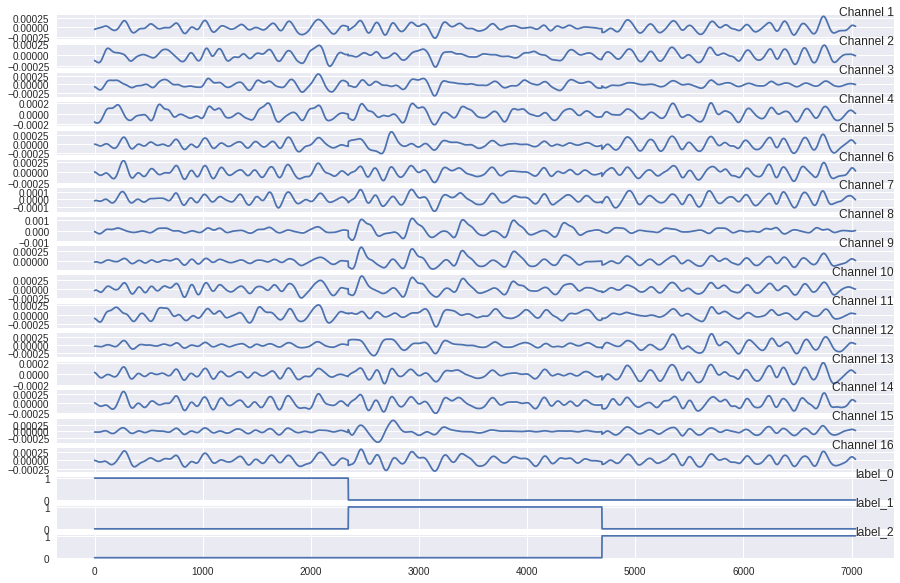

In [28]:
# Below I compare the mean of different featuresresampled over day. 
# specify columns to plot
cols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,16,17,18]
i = 1
values = df.resample('1S').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in cols:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='right')
	i += 1
plt.show()


# 지금부터 LSTM을 이용한 Supervised Learning 
### 같은 시간의 16 channels 데이터에서 동일한 t순간의 Label을 예측

### 데이터 resample, 전채널 데이터 수집

In [35]:

df_resample = df.resample('1S').mean() 
print(df_resample.shape)
df1_resample = df1.resample('1S').mean() 
print(df1_resample.shape)
df2_resample = df2.resample('1S').mean() 
print(df2_resample.shape)
df3_resample = df3.resample('1S').mean() 
print(df3_resample.shape)
df4_resample = df4.resample('1S').mean() 
print(df4_resample.shape)
df5_resample = df5.resample('1S').mean() 
print(df5_resample.shape)
df6_resample = df6.resample('1S').mean() 
print(df6_resample.shape)
df7_resample = df7.resample('1S').mean() 
print(df7_resample.shape)


(7038, 19)
(7038, 19)
(7038, 19)
(7038, 19)
(7038, 19)
(7038, 19)
(7038, 19)
(7038, 19)


### *특징 크기를 [0,1]로 정규화 

In [36]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
#     for i in range(n_in, 0, -1):
#         cols.append(dff.shift(i))
#         names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

## If you would like to train based on the resampled data (over hour), then used below

#print(values.shape)
## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
df_resample = df_resample.astype('float32')
df1_resample = df1_resample.astype('float32')
df2_resample = df2_resample.astype('float32')
df3_resample = df3_resample.astype('float32')
df4_resample = df4_resample.astype('float32')
df5_resample = df5_resample.astype('float32')
df6_resample = df6_resample.astype('float32')
df7_resample = df7_resample.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df_resample.values)
scaled1 = scaler.fit_transform(df1_resample.values)
scaled2 = scaler.fit_transform(df2_resample.values)
scaled3 = scaler.fit_transform(df3_resample.values)
scaled4 = scaler.fit_transform(df4_resample.values)
scaled5 = scaler.fit_transform(df5_resample.values)
scaled6 = scaler.fit_transform(df6_resample.values)
scaled7 = scaler.fit_transform(df7_resample.values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed1 = series_to_supervised(scaled1, 1, 1)
reframed2 = series_to_supervised(scaled2, 1, 1)
reframed3 = series_to_supervised(scaled3, 1, 1)
reframed4 = series_to_supervised(scaled4, 1, 1)
reframed5 = series_to_supervised(scaled5, 1, 1)
reframed6 = series_to_supervised(scaled6, 1, 1)
reframed7 = series_to_supervised(scaled7, 1, 1)
# reframed = pd.DataFrame(scaled.copy())
# print(scaled.shape)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]], axis=1, inplace=True)
# reframed.drop(reframed.columns[np.arange(0,19)], axis=1, inplace=True)

# print(reframed.head())
print(reframed.shape)

(7038, 19)


### t 순간에서의 16개의 channels 데이터와 3개의 output으로 구성

### * 이제 train과 test sets으로 데이터를 나눔. 실험자 1명당 3가지 작업에 대하여 4개의 trials = 12trials를 학습하고 나머지 3trials를 예측. 총 8명의 실험자이므로 96개의 trials 학습, 24개의 trials classification

### Model architecture

### 1) LSTM with proper neurons in the first visible layer 
### 3) dropout 20%
### 4) 3 neuron in the final output layer for predicting classification accuracy.
### 5) The input shape will be 469 time step with 19 features.
### 6) I use the Categorical_crossentropy loss function for multi-class classification and the customized SGD.
### 7) The model will be fit for 40 training epochs with a batch size of 8.

In [37]:
# split into train and test sets
values = reframed.values
values1 = reframed1.values
values2 = reframed2.values
values3 = reframed3.values
values4 = reframed4.values
values5 = reframed5.values
values6 = reframed6.values
values7 = reframed7.values
# index_list = [2346,4692]
# train = [values[:index_list[0]],values[index_list[0]:index_list[1]],values[index_list[1]:]]
print(values1.shape)
n_train_time = 1875
train = values[:n_train_time,:]
train = np.concatenate((train, np.zeros((1,19)), values[2347:4222,:],np.zeros((1,19)), values[4692:6567,:],np.zeros((1,19)))) #ㅇㄴ
train = np.concatenate((train, values1[:n_train_time,:]))
train = np.concatenate((train, np.zeros((1,19)), values1[2347:4222,:],np.zeros((1,19)), values1[4692:6567,:],np.zeros((1,19))))
train = np.concatenate((train, values2[:n_train_time,:]))
train = np.concatenate((train, np.zeros((1,19)), values2[2347:4222,:],np.zeros((1,19)), values2[4692:6567,:],np.zeros((1,19))))
train = np.concatenate((train, values3[:n_train_time,:]))
train = np.concatenate((train, np.zeros((1,19)), values3[2347:4222,:],np.zeros((1,19)), values3[4692:6567,:],np.zeros((1,19))))
train = np.concatenate((train, values4[:n_train_time,:]))
train = np.concatenate((train, np.zeros((1,19)), values4[2347:4222,:],np.zeros((1,19)), values4[4692:6567,:],np.zeros((1,19))))
train = np.concatenate((train, values5[:n_train_time,:]))
train = np.concatenate((train, np.zeros((1,19)), values5[2347:4222,:],np.zeros((1,19)), values5[4692:6567,:],np.zeros((1,19))))
train = np.concatenate((train, values6[:n_train_time,:]))
train = np.concatenate((train, np.zeros((1,19)), values6[2347:4222,:],np.zeros((1,19)), values6[4692:6567,:],np.zeros((1,19))))
train = np.concatenate((train, values7[:n_train_time,:]))
train = np.concatenate((train, np.zeros((1,19)), values7[2347:4222,:],np.zeros((1,19)), values7[4692:6567,:],np.zeros((1,19))))
train = np.reshape(train,[-1,469,19])

n_test_time = 2344
test = values[n_train_time:n_test_time,:]
test = np.concatenate((test, values[4222:4691,:]))
test = np.concatenate((test, values[6568:7037,:]))
test = np.concatenate((test,values1[n_train_time:n_test_time,:]))

test = np.concatenate((test, values1[4222:4691,:]))
test = np.concatenate((test, values1[6568:7037,:]))
test = np.concatenate((test,values2[n_train_time:n_test_time,:]))
test = np.concatenate((test, values2[4222:4691,:]))
test = np.concatenate((test, values2[6568:7037,:]))
test = np.concatenate((test,values3[n_train_time:n_test_time,:]))
test = np.concatenate((test, values3[4222:4691,:]))
test = np.concatenate((test, values3[6568:7037,:]))
test = np.concatenate((test,values4[n_train_time:n_test_time,:]))
test = np.concatenate((test, values4[4222:4691,:]))
test = np.concatenate((test, values4[6568:7037,:]))
test = np.concatenate((test,values5[n_train_time:n_test_time,:]))
test = np.concatenate((test, values5[4222:4691,:]))
test = np.concatenate((test, values5[6568:7037,:]))
test = np.concatenate((test,values6[n_train_time:n_test_time,:]))
test = np.concatenate((test, values6[4222:4691,:]))
test = np.concatenate((test, values6[6568:7037,:]))
test = np.concatenate((test,values7[n_train_time:n_test_time,:]))
test = np.concatenate((test, values7[4222:4691,:]))
test = np.concatenate((test, values7[6568:7037,:]))

test = np.reshape(test,[-1,469,19])
train_X, train_y = train[:,:, :-3], train[:,:, 16:19]
test_X, test_y = test[:,:, :-3], test[:,:, 16:19]
train_y = to_categorical(np.argmax(np.mean(train_y, axis=1),axis=1), num_classes=3)
test_y = to_categorical(np.argmax(np.mean(test_y, axis=1),axis=1), num_classes=3)
print("train_X shape: {},train_Y shape: {},test_X shape: {},test_Y shape: {}".format(
    train_X.shape, train_y.shape, test_X.shape, test_y.shape))

(7038, 19)
train_X shape: (96, 469, 16),train_Y shape: (96, 3),test_X shape: (24, 469, 16),test_Y shape: (24, 3)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 467, 128)          6272      
_________________________________________________________________
lstm_25 (LSTM)               (None, 467, 64)           49408     
_________________________________________________________________
dropout_24 (Dropout)         (None, 467, 64)           0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 29888)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 89667     
Total params: 145,347.0
Trainable params: 145,347.0
Non-trainable params: 0.0
_________________________________________________________________
None
Train on 96 samples, validate on 24 samples
Epoch 1/20
4s - loss: 1.7543 - acc: 0.2292 - val_loss: 1.1581 - val_acc: 0.3333
E

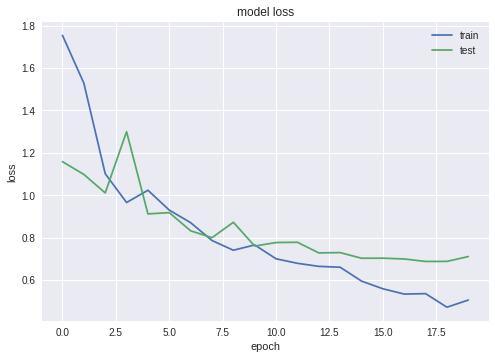

In [77]:
# expected input data shape: [batch_size, timesteps, data_dim].
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Convolution1D
from keras.models import Sequential

model = Sequential() #여러개 쌓을땐 return_sequences=True
model.add(Convolution1D(128, 3, input_shape=(469, 16)))
model.add(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True)) 
# model.add(Dropout(0.2))
# model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.2))
model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dropout(0.2))
# model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

sgd = keras.optimizers.SGD(lr=0.005, decay=0.01, momentum=0.9, nesterov=True)
# adam_opti = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# fit network
print(model.summary())

history = model.fit(train_X, train_y, 
                    epochs=20, batch_size=4, 
                    validation_data=(test_X, test_y), 
                    verbose=2, shuffle=True)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [39]:
from keras import backend as K
from sklearn.metrics import accuracy_score
# make a prediction
yhat = model.predict(test_X)
#y_train = y_train.astype('float32')
#yhat = K.constant(yhat)
#test_y = K.constant(test_y)
def categorical_accuracy(y_true, y_pred):
    return np.mean(np.equal(np.argmax(y_pred,axis=1),np.argmax(y_true,axis=1)))

print(np.argmax(yhat,axis=1))
print(np.argmax(test_y,axis=1))
acc = categorical_accuracy(test_y, yhat)
print("Accuracy:{}".format(acc))


[0 1 1 0 1 0 1 2 1 2 1 2 1 1 2 1 1 2 2 1 1 2 1 2]
[0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2]
Accuracy:0.5416666666666666


In [40]:
yhat = model.predict(test_X)
print(yhat)
print(test_y)

[[ 0.43166825  0.42030451  0.14802729]
 [ 0.32709798  0.38946128  0.28344074]
 [ 0.32292277  0.3792282   0.297849  ]
 [ 0.41077054  0.35316598  0.23606347]
 [ 0.21261825  0.70278817  0.08459363]
 [ 0.43477067  0.22282127  0.34240809]
 [ 0.31380579  0.43686903  0.24932519]
 [ 0.33816707  0.21884532  0.44298759]
 [ 0.31361988  0.43715844  0.24922168]
 [ 0.32579747  0.2831288   0.39107373]
 [ 0.3048847   0.45940468  0.23571067]
 [ 0.32739007  0.2394484   0.43316159]
 [ 0.15535441  0.43333411  0.41131148]
 [ 0.25498688  0.4438014   0.30121171]
 [ 0.27842867  0.24985075  0.47172058]
 [ 0.33486286  0.39743865  0.26769847]
 [ 0.15544596  0.78344321  0.06111077]
 [ 0.22861995  0.28176761  0.48961243]
 [ 0.32230458  0.26703659  0.41065881]
 [ 0.13826045  0.56304175  0.29869777]
 [ 0.22720465  0.41743574  0.35535961]
 [ 0.33782968  0.30188188  0.36028841]
 [ 0.22428188  0.67702818  0.09869   ]
 [ 0.31181461  0.27824938  0.40993604]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 